In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os.path
import sys
from fastai.imports import *
from fastai.tabular import *
import pandas as pd
from pandas_summary import DataFrameSummary
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import forest
from IPython.display import display
from sklearn import metrics

In [3]:
# wherever you save your trian data
PATH = 'C:/Users/Farash/data/bulldozer/'

In [4]:
# just to make sure you got the right path
!dir C:\Users\Farash\data\bulldozer

 Volume in drive C has no label.
 Volume Serial Number is F470-0CD4

 Directory of C:\Users\Farash\data\bulldozer

06/18/2019  03:50 AM    <DIR>          .
06/18/2019  03:50 AM    <DIR>          ..
01/24/2013  05:08 PM       116,403,970 Train.csv
               1 File(s)    116,403,970 bytes
               2 Dir(s)  66,608,918,528 bytes free


In [5]:
#load the data as csv file (slow)
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [6]:
display(df_raw)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [7]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
SalesID,401125.0,1.919713e+06,909021.492667,1139246.0,1418371.0,1639422.0,2242707.0,6333342.0
SalePrice,401125.0,3.109971e+04,23036.898502,4750.0,14500.0,24000.0,40000.0,142000.0
MachineID,401125.0,1.217903e+06,440991.954249,0.0,1088697.0,1279490.0,1468067.0,2486330.0
ModelID,401125.0,6.889703e+03,6221.777842,28.0,3259.0,4604.0,8724.0,37198.0
datasource,401125.0,1.346658e+02,8.962237,121.0,132.0,132.0,136.0,172.0
auctioneerID,380989.0,6.556040e+00,16.976779,0.0,1.0,2.0,4.0,99.0
YearMade,401125.0,1.899157e+03,291.797469,1000.0,1985.0,1995.0,2000.0,2013.0
MachineHoursCurrentMeter,142765.0,3.457955e+03,27590.256413,0.0,0.0,0.0,3025.0,2483300.0


In [8]:
def display_all(df):
    #function to display all rows and columns 
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [10]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# replace a column with a new column as it makes more sense talking in log(precentages) about the price
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [12]:
# test
df_raw.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
5         10.184900
6          9.952278
7         10.203592
8          9.975808
9         11.082143
10        10.085809
11        10.021271
12        10.491274
13        10.325482
14        10.239960
15         9.852194
16         9.510445
17         9.159047
18         9.433484
19         9.350102
20        10.621327
21        10.448715
22        10.165852
23        11.198215
24        10.404263
25         9.433484
26         9.648595
27        10.878047
28        10.736397
29        11.396392
            ...    
401095     9.259131
401096     9.210340
401097     9.047821
401098     9.259131
401099     9.305651
401100     9.259131
401101     9.210340
401102     9.259131
401103     9.433484
401104     9.259131
401105     9.210340
401106     9.259131
401107     9.433484
401108     9.259131
401109     9.259131
401110     9.259131
401111     9.210340
401112     9.259131
401113     9.259131


In [13]:
# data cleaning (1)
# in order to make every column is number we deduce many cloumns from saledate such as year,month,day,is_it_holiday,.. and so on
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [14]:
def train_cats(df):
    # function that transform categorical string into numbers (-1 if its null)
    for n,c in df.items():
        if pd.api.types.is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()

In [15]:
#data cleaning (2)
#we transform categorical string -> numbers ( -1 if its null )
train_cats(df_raw)

In [16]:
# .cat accessor only works with categorical dtype
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [17]:
#we replace the text categories with numbers (codes)
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [18]:
#test
df_raw.UsageBand

0         1
1         1
2         0
3         0
4         2
5         1
6         0
7         0
8         1
9         2
10        2
11        1
12       -1
13        2
14        1
15        2
16        1
17       -1
18        1
19        2
20        2
21        2
22        1
23        0
24        2
25        2
26        1
27       -1
28        1
29        2
         ..
401095   -1
401096   -1
401097   -1
401098   -1
401099   -1
401100   -1
401101   -1
401102   -1
401103   -1
401104   -1
401105   -1
401106   -1
401107   -1
401108   -1
401109   -1
401110   -1
401111   -1
401112   -1
401113   -1
401114   -1
401115   -1
401116   -1
401117   -1
401118   -1
401119   -1
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Name: UsageBand, Length: 401125, dtype: int8

In [19]:
#we have lots of missing values, which we can't pass directly to a random forest.
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [20]:
# feather save load much much faster than csv save  

os.makedirs('aa', exist_ok=True)
df_raw.to_feather('aa/bulldozers-raw')

In [21]:
df_raw = pd.read_feather('aa/bulldozers-raw')

C:\Users\Farash\Anaconda3\lib\site-packages\pandas\io\feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [22]:
def scale_var(df):
    #helper function
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    map_f = [([n],StandardScaler()) for n in df.columns if pd.api.types.is_numeric_dtype(df[n])]
    mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

In [23]:
def numericalize(df,col,name,max_n_cat):
    #if categorical place is missing panads cat code automatically become -1 so we replace it with cat.code +1 
    if not pd.api.types.is_numeric_dtype(col) and ( max_n_cat is None or col.nunique()>max_n_cat):
        df[name] = col.cat.codes + 1 

In [24]:
def fix_missing(df,col,name):
    #if numercial place is missing replace it with median and add new column to let us know which ones were missing
    if pd.api.types.is_numeric_dtype(col):
        if pd.isnull(col).sum(): df[name + '_na'] = pd.isnull(col)
        df[name] = col.fillna(col.median())

In [25]:
def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    Parameters """ 
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [26]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    """
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

In [27]:
#We'll replace categories with their numeric codes, handle missing continuous values,
#and split the dependent variable into a separate variable.
df, y , _ = proc_df(df_raw, 'SalePrice')

In [28]:
# check that every column is a number (no problem)
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,1,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,1,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,0,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,0,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


In [29]:
#We now have something we can pass to a random forest!
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y) #model using 1 tree access all data

C:\Users\Farash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9829610329672754

In [30]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [31]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [32]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m) # model using 40 trees each tree can access the whole dataset

Wall time: 2min 26s
[0.0782744266696133, 0.23737449587908446, 0.9871951464255713, 0.8993726386376928]


In [33]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

In [34]:
set_rf_samples(20000)

In [35]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m) #model using 40 trees each tree only takes 20k samples with min_samples_leaf = 3 and max_featues = 0.5

Wall time: 16.7 s
[0.2339677069867342, 0.2642678635132072, 0.8855945631963916, 0.8752798336961138, 0.8769605433404958]


In [36]:
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [37]:
reset_rf_samples()

In [38]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5 , n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)  #model using 40 trees each tree can access the whole dataset with min_samples_leaf = 3 and max_featues = 0.5

Wall time: 1min 13s
[0.11919121676556836, 0.22839580726983041, 0.9703091020222477, 0.9068411264924771, 0.9117184748457989]


In [39]:
#features importance and removing unimportant columns

In [40]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
5,YearMade,0.167926
37,Coupler_System,0.130680
14,fiProductClassDesc,0.088825
13,ProductSize,0.084566
2,ModelID,0.064564
63,saleElapsed,0.054209
10,fiSecondaryDesc,0.046780
38,Grouser_Tracks,0.035966
39,Hydraulics_Flow,0.035901
8,fiModelDesc,0.033829


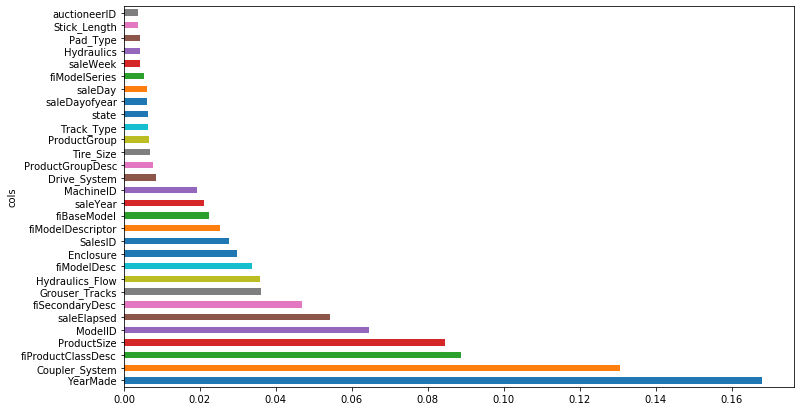

In [41]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [42]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
#model after removing unimportant features 40 tree can access the whole dataset with min_samples_leaf=3 and max_features=0.5
print_score(m)

[0.12460555356106309, 0.22407758486174403, 0.9675503793669137, 0.9103304884840999, 0.9102172737117316]


In [43]:
#removing reduent features (high rank correlation)

In [44]:
from scipy.cluster import hierarchy as hc

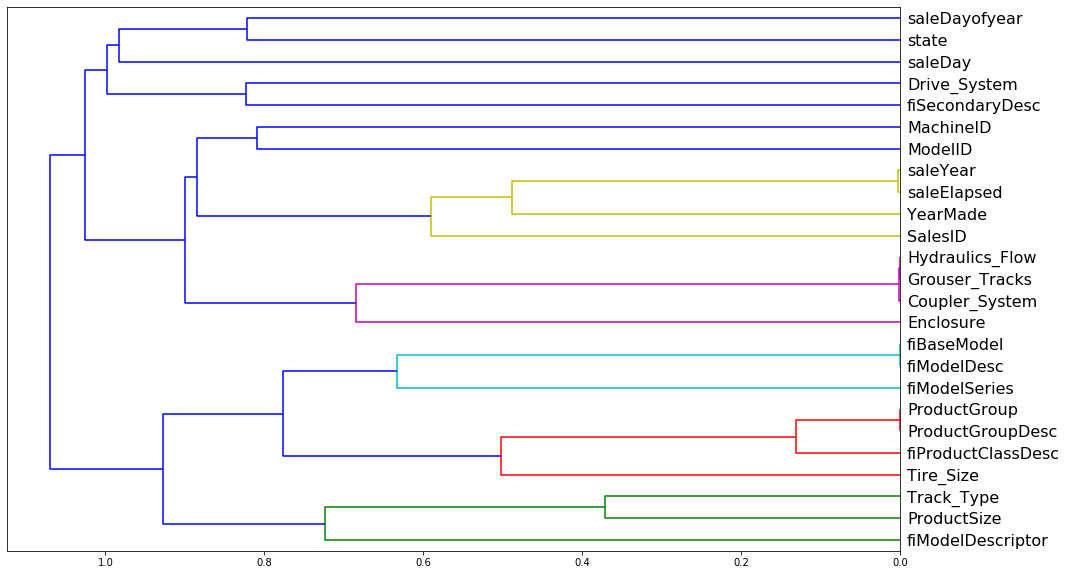

In [45]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4) #spearmnar is the most famous rank correlation 
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show() #to see the similar features

In [46]:
def get_oob(df):
    '''
    so we can test the validation score after removing some features and make sure that it didnt effects the score 
    '''
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

get_oob(df_keep)      
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print('after removing: ',c,' validation score is: ', get_oob(df_keep.drop(c, axis=1)))

C:\Users\Farash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Farash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


after removing:  saleYear  validation score is:  0.9063537001120383
after removing:  saleElapsed  validation score is:  0.9050127296372491
after removing:  fiModelDesc  validation score is:  0.9063658163812282
after removing:  fiBaseModel  validation score is:  0.9068117613588477


C:\Users\Farash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


after removing:  Grouser_Tracks  validation score is:  0.9068118809157375
after removing:  Coupler_System  validation score is:  0.9069554188625953


In [47]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks'] #drop the redundant features
get_oob(df_keep.drop(to_drop, axis=1)) #check the validation score after removing features

0.9064672988378026

In [48]:
df_keep.drop(to_drop, axis=1, inplace=True) 
X_train, X_valid = split_vals(df_keep, n_trn)

In [49]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m) #model after removing (all) redundant features , 40 tree access all samples, min_samples_leaf=3, max_features=0.5

[0.12496117057677103, 0.22673457824784576, 0.9673648963984983, 0.9081913737835059, 0.9090234714343435]


In [50]:
#one hot encoding
df_trn2, y_trn, nas = proc_df(df_raw , 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11787930922793799, 0.23386934812633553, 0.9709591054048425, 0.9023224890507513, 0.9104774415000603]


In [51]:
# Extrapolation

In [52]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

C:\Users\Farash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999975070115301

In [54]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
10,SalesID,0.811549
5,saleElapsed,0.131688
12,MachineID,0.045099
19,saleDayofyear,0.003593
4,ModelID,0.002553
0,YearMade,0.002445
8,fiModelDesc,0.001461
1,Coupler_System,0.000695
7,Hydraulics_Flow,0.000396
14,ProductGroupDesc,0.000171


In [55]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [56]:
x.drop(feats, axis=1, inplace=True)
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9778622623870364

In [57]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
16,saleDayofyear,0.242293
15,state,0.157075
17,saleDay,0.131976
4,ModelID,0.100198
0,YearMade,0.098171
7,fiModelDesc,0.088332
2,fiProductClassDesc,0.041483
5,fiSecondaryDesc,0.029602
8,Enclosure,0.025956
9,fiModelDescriptor,0.012504


In [58]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'state', 'saleDay', 'saleDayofyear']

In [59]:
set_rf_samples(50000)

X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m) # check the orignal score using 50k samples

[0.20832379705441909, 0.24622769687233947, 0.9092988921872416, 0.8917265987477887, 0.8927977698967653]


In [60]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m) #checking the score everytime you drop on of the features if its getting better remove the feature for sure

SalesID
[0.20963238450181698, 0.24258320725750918, 0.9081558340256506, 0.8949080522211982, 0.8922377255580994]
saleElapsed
[0.26052081398757554, 0.2541709990244253, 0.8581531555100386, 0.8846281209877681, 0.8334505241333388]
MachineID
[0.20749960518080185, 0.24498171740734118, 0.9100151544686655, 0.8928196122840713, 0.8945526664234735]
state
[0.2090443373597515, 0.24701142292966774, 0.9086703818957041, 0.8910362480399346, 0.8927094767765865]
saleDay
[0.20884874306612575, 0.24749812890262093, 0.9088412087668428, 0.8906064253529674, 0.8929191742424498]
saleDayofyear
[0.20929285675581408, 0.24506683396142087, 0.9084531009740399, 0.8927451217450787, 0.8926227394892282]


In [61]:
reset_rf_samples()
#make sure that you only remove the features that make the score worse
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear','state'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m) #check output after solving extrapolation

[0.14674455555295504, 0.22111782107774264, 0.9549952016063806, 0.9126836714712726, 0.9084507872960527]


In [62]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m) #final model

Wall time: 2min
[0.08243228127831591, 0.21567810441248314, 0.9857986554622652, 0.9169269626258154, 0.9124152844527895]
